1) Import the libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2) Normalize the features

In [2]:
# Separate features and target variable
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shape of the datasets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (537, 8)
Validation set shape: (115, 8)
Test set shape: (116, 8)


3) Building the Neural Network Model

In [6]:
# Build the neural network model
model = Sequential([
    Dense(12, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

4) Evaluating the Model

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5461 - loss: 0.6863 - val_accuracy: 0.7043 - val_loss: 0.6614
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6878 - loss: 0.6550 - val_accuracy: 0.7304 - val_loss: 0.6235
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7114 - loss: 0.5978 - val_accuracy: 0.7043 - val_loss: 0.5898
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7348 - loss: 0.5653 - val_accuracy: 0.7043 - val_loss: 0.5616
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.5213 - val_accuracy: 0.7217 - val_loss: 0.5485
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7597 - loss: 0.4978 - val_accuracy: 0.7217 - val_loss: 0.5392
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4625 - val_accuracy: 0.7304 - val_loss: 0.5380
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7597 - loss: 0.4714 - val_accuracy: 0.7304 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7357 - loss: 0.6790 
Test Accuracy: 0.7586
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Precision: 0.6744
Recall: 0.6744
F1 Score: 0.6744


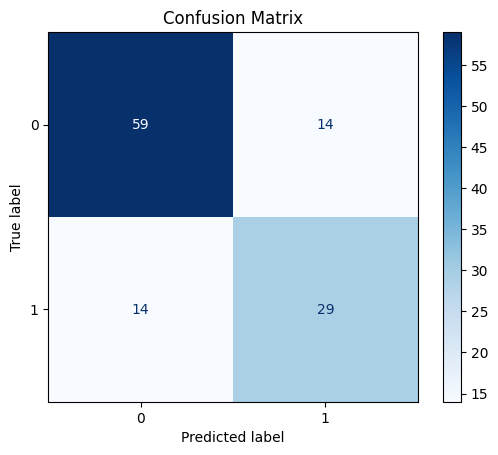

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model on the test data (as before)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test data (as before)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate precision, recall, and F1 score (as before)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

5) Visualization and Analysis

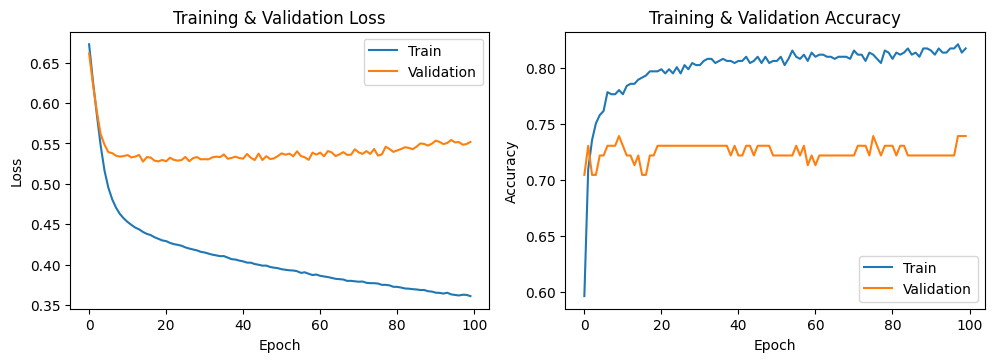

In [15]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot training and validation loss
plt.subplot(3, 3, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(3, 3, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

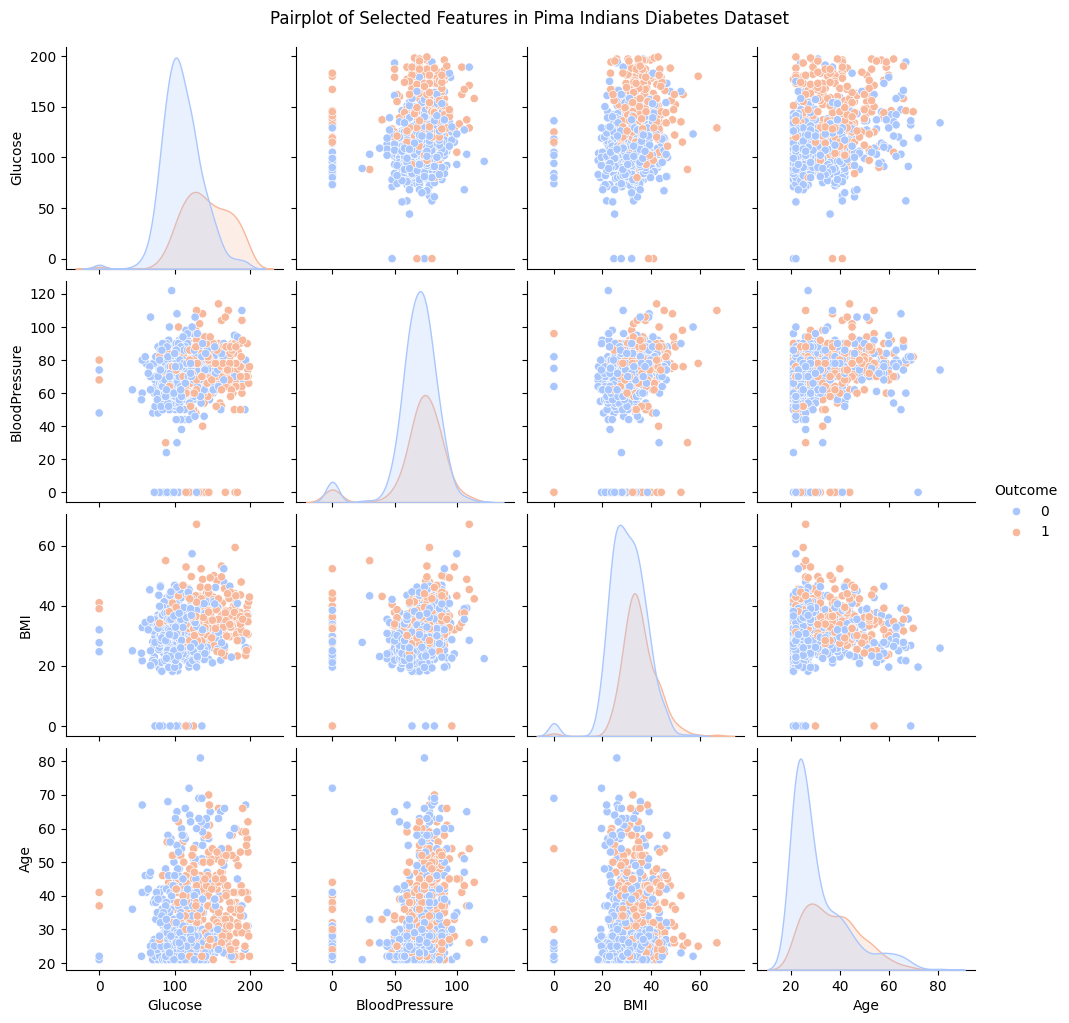

In [23]:
targeted_columns = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']

# Create a pairplot for the selected columns
plt.figure(figsize=(12, 10))
sns.pairplot(data[targeted_columns], hue='Outcome', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features in Pima Indians Diabetes Dataset', y=1.02)
plt.show()

6) Model Persistence

In [16]:
# Save the model
model.save('pima_diabetes_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('pima_diabetes_model.h5')

# Use the loaded model to make predictions
loaded_y_pred = (loaded_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the loaded model
loaded_test_accuracy = accuracy_score(y_test, loaded_y_pred)
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Loaded Model Test Accuracy: 0.7586
